In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, Dense, TimeDistributed
import matplotlib.pyplot as plt


In [3]:
# Load the CSV file
file_path = 'C:/Users/KIIT/Desktop/hydrofinal/dummy_hydropower_data.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

,date,region,precipitation,temperature,reservoir_level,turbine_efficiency,flow_rate,power_generation
0,2010-01-31,East,251.860039,10.526797,58.446753,80.261889,807.710513,87.065485
1,2010-02-28,West,274.022825,20.731529,63.929517,93.270747,180.469902,73.931702
2,2010-03-31,North,129.500869,13.330116,58.850524,83.560719,475.822698,180.767535
3,2010-04-30,East,77.512981,16.824672,54.435127,99.221406,891.206477,82.882098
4,2010-05-31,East,106.983791,32.658592,56.031794,82.973255,950.258820,196.379788


Epoch 1/40


C:\Users\KIIT\AppData\Local\Temp\ipykernel_21536\3579648697.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 - 2s - 251ms/step - loss: 18088.3262 - mae: 127.5895 - val_loss: 16663.1309 - val_mae: 121.3843
Epoch 2/40
6/6 - 0s - 15ms/step - loss: 17848.8164 - mae: 126.6556 - val_loss: 16408.9355 - val_mae: 120.3303
Epoch 3/40
6/6 - 0s - 15ms/step - loss: 17526.9102 - mae: 125.3765 - val_loss: 16054.5908 - val_mae: 118.8431
Epoch 4/40
6/6 - 0s - 15ms/step - loss: 17077.6406 - mae: 123.5759 - val_loss: 15564.7314 - val_mae: 116.7535
Epoch 5/40
6/6 - 0s - 16ms/step - loss: 16464.7559 - mae: 121.0707 - val_loss: 14895.7842 - val_mae: 113.8367
Epoch 6/40
6/6 - 0s - 16ms/step - loss: 15633.3643 - mae: 117.5697 - val_loss: 14009.0254 - val_mae: 109.8491
Epoch 7/40
6/6 - 0s - 14ms/step - loss: 14551.9707 - mae: 112.8862 - val_loss: 12873.9238 - val_mae: 104.5216
Epoch 8/40
6/6 - 0s - 14ms/step - loss: 13183.0283 - mae: 106.6518 - val_loss: 11481.7871 - val_mae: 97.5893
Epoch 9/40
6/6 - 0s - 15ms/step - loss: 11554.6113 - mae: 98.6762 - val_loss: 9850.9258 - val_mae: 88.7744
Epoch 10/40
6/6 - 0s - 1

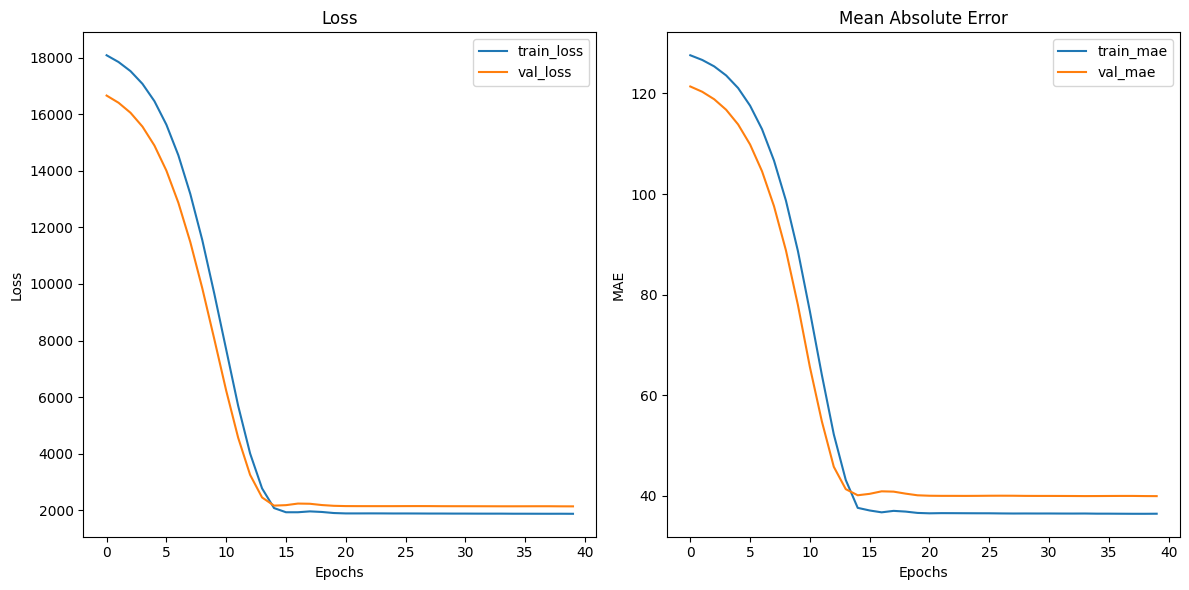

['label_encoderx.pkl']

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import joblib

# Handle missing values
data.fillna(method='ffill', inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
data['region'] = label_encoder.fit_transform(data['region'])

# Normalize features
features = data[['precipitation', 'temperature', 'reservoir_level', 'turbine_efficiency','flow_rate']]
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Prepare the target variable
target = data['power_generation'].values

# Structure data for time series analysis
sequence_length = 5
X = []
y = []

for i in range(len(features_scaled) - sequence_length):
    X.append(features_scaled[i:i+sequence_length])
    y.append(target[i+sequence_length])

X = np.array(X)
y = np.array(y)

# Split into training and testing sets
split_ratio = 0.8
train_size = int(len(X) * split_ratio)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the CNN-LSTM model
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=40, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Absolute Error: {mae}')

# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='train_mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.title('Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

# Save the model and scalers
model.save('hydropowercheck_model.h5')
joblib.dump(scaler, 'scalerx.pkl')
joblib.dump(label_encoder, 'label_encoderx.pkl')
